# Выполнение кейсового задания по модудю "Визуализация". Работа с данными для руководства банка.

## Подготовительная часть

### Подгрузка библиотек

In [4]:
# Подгружаем библиотеки для работы с данными (Pandas и Numpy)

import pandas as pd
import numpy as np

# Подгружаем библиотеки для визуализации

import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

### Создание DataFrame и минимальная обработка данных

In [5]:
# Создаем DataFrame

churn_data = pd.read_csv('data/churn.csv', sep=',', decimal='.')

# Проводим очистку от лишнего столбца,
# добавляем столбец с единицами для удобства 
# (будем использовать его для подсчета количества человек)

churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data['Clients'] = 1
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Clients
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


## Выполнение заданий

### 9.1. Соотношение ушедших и лояльных клиентов

Построим круговую диаграмму для сравнения 2 категорий клиентов

In [6]:
fig = px.pie(
    data_frame=churn_data,
    names=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title='Соотношение ушедших и лояльных клиентов',
    values=churn_data['Clients'],
    width=700,
    height=550
)

fig.update_layout(legend_title='Категория', font_size=14)

fig.show()
fig.write_html('files to share/9.1.html')

Вывод: 
Процент ушедших из банка клиентов за рассматриваемый период составляет 20.4%.
При желании можно дополнительно увидеть, что количество ушедших клиентов составляет 2 037 человек (для сравнения, число лояльных - 7 963).

### 9.2. Распределение баланса пользователей, у которых на счету больше 2 500 долларов

Для начала создадим необходимую выборку с помощью нужной маски

In [7]:
limited_balance = churn_data[churn_data['Balance'] >= 2500]

Затем построим гистограмму для демонстрации распределения количественного признака и добавим кривую сглаживания

<AxesSubplot: title={'center': 'Распределение баланса клиентов'}, xlabel='Баланс клиента (в тыс. USD)', ylabel='Количество клиентов'>

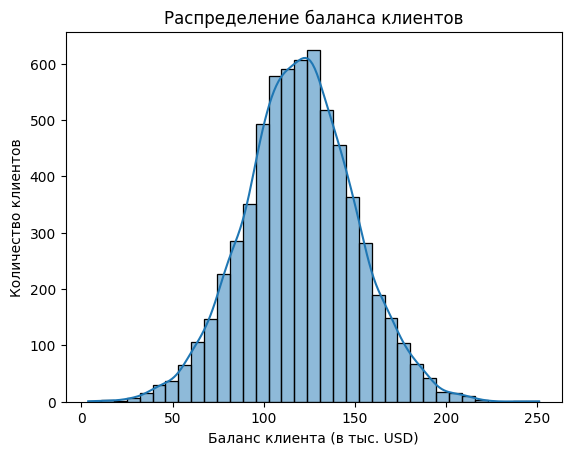

In [8]:
histogr = sns.histplot(
    limited_balance,
    x=limited_balance['Balance'] / 1000,
    bins=35,
    kde=True
)

histogr.set_title('Распределение баланса клиентов')
histogr.set_xlabel('Баланс клиента (в тыс. USD)')
histogr.set_ylabel('Количество клиентов')

display(histogr)

Вывод:
Наибольшая доля клиентов имеет баланс примерно от 100 до 140 тыс. у.е. После 125-130 тыс у.е. начинается снижение количества клиентов.
После этого числа наблюдается снижение количества клиентов.

Причиной такой ситуации может быть недоверие со стороны наиболее крупных клиентов, которые как правило выбирают банки, предоставляющие услуги исключительно подобным клиентам.
Причиной того, почему клиенты с более низким балансом на счете менее активно пользуются услугами банка, заключается в том, что данная аудитория или не пользуется банковскими услугами, или предпочитает банки, наиболее разрекламированные в СМИ.
Также для более точного анализа причин необходимо понимать экономическую обстановку в стране и уровень финансовой грамотности населения.

### 9.3. Распределение баланса клиента в разрезе признака оттока

Для анализа распределения баланса клиента в разрезе признака оттока пострим гистограмму с учетом категории клиента.

<AxesSubplot: title={'center': 'Распределение баланса клиентов'}, xlabel='Баланс клиента (в тыс. USD)', ylabel='Количество клиентов'>

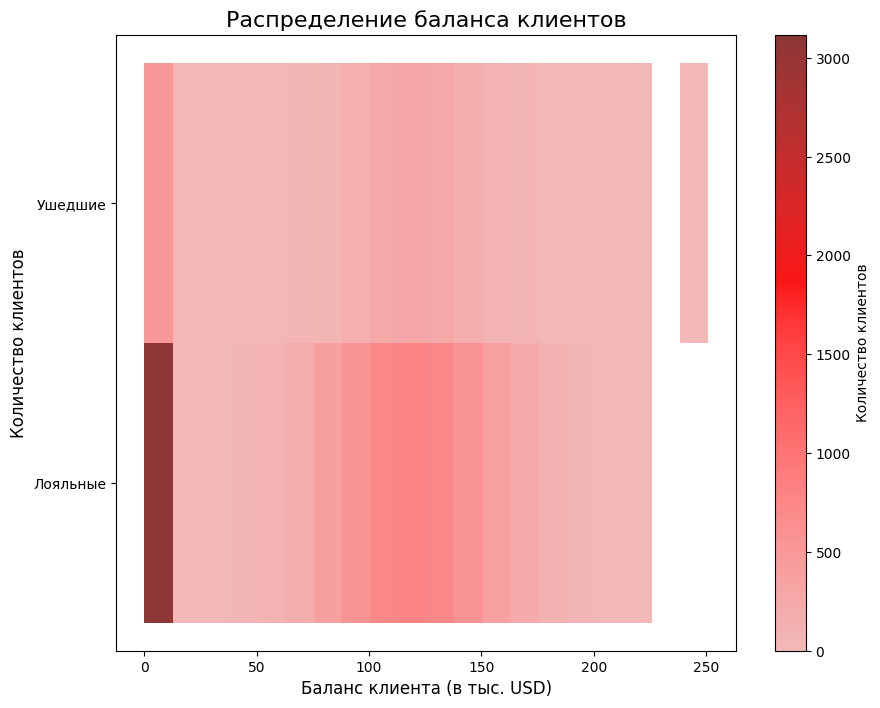

In [9]:
histogr = plt.figure(figsize=(10, 8))

histogr = sns.histplot(
    churn_data,
    x=churn_data['Balance'] / 1000,
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    bins=20,
    color='red',
    cbar=True,
    cbar_kws={'label' : 'Количество клиентов'},
    stat='count'
)

histogr.set_title('Распределение баланса клиентов', fontsize=16)
histogr.set_xlabel('Баланс клиента (в тыс. USD)', fontsize=12)
histogr.set_ylabel('Количество клиентов', fontsize=12)

display(histogr)

Вывод: 
Распределения клиентов в разрезе признака оттока в целом совпадают. Наибольшее количество клиентов имеют нулевой баланс (возможно это люди, которые берут кредиты).
Однако среди ушедших клиентов также встречаются люди с максимальным балансом на счете.
Для удержания клиентов следует сконцентрироваться на программах кредитования, программах, рассчитанных на клиентов с балансом в 90-150 тыс. долларов США и привлечении клиентов с возможностью инвестирования крупного капитала.

### 9.4. Распределение возраста в разрезе признака оттока

Для анализа распределения возраста построим коробчатую диаграмму с учетом категории клиента.

In [10]:
age_box = px.box(
    churn_data,
    x='Age',
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title='Возрастное распределение клиентов',
    height=600,
    width=1000,
    
)

age_box.update_layout(
    xaxis_title='Возраст',
    yaxis_title='Категория',
    title_font_size=20
)

age_box.show()
age_box.write_html('files to share/9.4.html')

Вывод: 
Лояльные клиенты в среднем моложе возрастных. Интервал диаграммы для лояльных - от 18 до 56 лет с медианой 36 лет, для ушедших - 19 - 70 лет с медианой в 45 лет. Однако у лояльных клиентов намного больше выбросов в сторону увеличения возраста. 
Стоит обратить внимание на пожилых и возрастных людей, т.к. люди старше 60 лет мало пользуются услугами банка.

### 9.5. Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

Для анализа кредитного рейтинга клиента и предполагаемой зарплаты в разрезе категории построим диаграмму рассеяния.

In [11]:
fig = px.scatter(
    data_frame=churn_data,
    x=churn_data['EstimatedSalary'] / 1000,
    y='CreditScore',
    color=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title= 'Зависимость кредитного рейтинга от дохода клиента',
    height=750,
    width=1100
)

fig.update_layout(
    xaxis_title='Доход клиента (в тыс. у.е.)',
    yaxis_title='Кредитный рейтинг',
    title_font_size=20,
    legend_font_size=14,
    legend_title='Группа'
)

fig.show()
fig.write_html('files to share/9.5.html')

Вывод:
Визуально не определяется взаимосвязь между доходом клиента, кредитным рейтингом и желанием клиента покинуть банк.
Единственный нюанс - все клиенты с рейтингом ниже 400 покинули банк, однако из-за их малого количества (18) данный факт непоказателен.

### 9.6. Кто чаще уходит, мужчины или женщины?

Данный вопрос можно трактовать двумя способами: 
 - какой процент мужчин и жещин среди ушедших (для визуализации ответа построим круговую диаграмму);
 - сколько процентов клиентов ушло среди всех женщин и среди всех мужчин (для визуализации построим горизонтальную гистограмму).

In [12]:
# Оцениваем долю ушедших среди мужчин и среди женщин

pie_data = churn_data[churn_data['Exited'] == 1]

fig = px.pie(
    data_frame=pie_data,
    names=pie_data['Gender'].map({'Female' : 'Женщины', 'Male' : 'Мужчины'}),
    title='Отношение полов среди ушедших клиентов',
    color_discrete_map={'Female' : 'red', 'Male':'cyan'},
    values=pie_data['Clients'],
    color_discrete_sequence=['#FF6692', '#17BECF'],
    width=700,
    height=550
)

fig.show()
fig.write_html('files to share/9.6.pie.html')

In [13]:
# Оцениваем процент ушедших клиентов для каждого пола

hist_data = churn_data.groupby('Gender', as_index=False)['Exited'].mean()
hist_data['Exited'] = hist_data['Exited'].round(4)

fig = px.histogram(
    data_frame=hist_data,
    y=hist_data['Gender'].map({'Female' : 'Женщины', 'Male' : 'Мужчины'}),
    x=hist_data['Exited']*100,
    color=hist_data['Gender'].map({'Female' : 'Женщины', 'Male' : 'Мужчины'}),
    title="Распределение ушедших клиентов по половому признаку",
    orientation='h',
    color_discrete_map={'Female' : 'red', 'Male' : 'blue'},
    color_discrete_sequence=['#FF6692', '#17BECF'],
    width=800,
    height=500,
    text_auto=True
)

fig.update_layout(
    xaxis_title='Доля ушедших',
    yaxis_title='Категория',
    coloraxis_colorbar_title='Категория',
    xaxis_ticksuffix='%',
    showlegend=False
)

fig.update_traces(text='%')

fig.show()
fig.write_html('files to share/9.6.hist.html')

Вывод: Женщины немного чаще покидают банк (25% женщин против 17% мужчин). Также среди ушедших клиентов больше женщин (56%).

### 9.7. Зависимость оттока клиентов от от числа приобретённых у банка услуг

Для ответа на этот вопрос построим многоуровневую столбчатую диаграмму.

<AxesSubplot: title={'center': 'Распределение клиентов по количеству продуктов'}, xlabel='Категория', ylabel='Количество клиентов'>

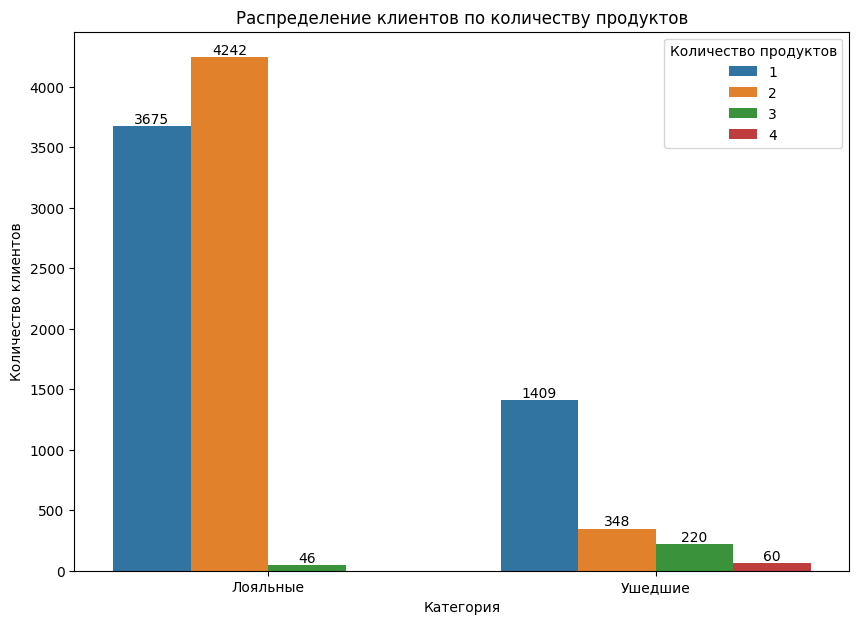

In [14]:
hist_data = churn_data.groupby(['Exited','NumOfProducts'], as_index=False)['Clients'].count()

fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=hist_data,
    x=hist_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    y='Clients',
    hue='NumOfProducts'
)

barplot.set_title('Распределение клиентов по количеству продуктов')
barplot.set_xlabel('Категория')
barplot.set_ylabel('Количество клиентов')
barplot.legend(title="Количество продуктов")

for i in barplot.containers:
    barplot.bar_label(i,)

display(barplot)

Вывод:
Среди лояльных клиентов наибольшее количество клиентов имеют только 2 банковских продукта. Также у большой доли клиентов в наличии только 1 продукт.
Большинство ушедших клиентов пользовались только 1 услугой. Однако только среди ушедших были клиенты, у которых было 4 банковских продукта. Более того, количество ушедших клиентов с 3 услугами превышает лояльных более чем в 4 раза. Таким образом, или клиенты с более чем 2 услугами "не задерживаются" в банке, или лояльные клиенты отказываются от дополнительных услуг.

### 9.8. Влияние наличия статуса активного клиента на отток клиентов

Для отображения влияния наличия статуса активного клиента на отток клиентов построим гистограмму.

In [15]:
actives = churn_data.groupby('Exited', as_index=False)['IsActiveMember'].mean().round(4)

fig = px.histogram(
    data_frame=actives,
    x=actives['IsActiveMember'] * 100,
    y=actives['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    color=actives['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    color_discrete_map={1:'green', 0: 'red'},
    color_discrete_sequence=['#00CC96', 'rgb(247,129, 191)'],
    width=900,
    height=400,
    text_auto=True
)

fig.update_layout(
    title='Соотношение активных членов по категориям',
    xaxis_title='Доля активных членов',
    yaxis_title='Категория',
    xaxis_ticksuffix='%',
    showlegend=False
)

fig.show()
fig.write_html('files to share/9.8.html')

Вывод: 
Среди лояльных клиентов больше половины имеют статус активных, тогда как среди ушедших активными были только 36%. Таким образом статус активного клиента делает вероятность лояльности клиента выше.

### 9.9. В какой стране доля ушедших клиентов больше

Определим доли ушедших клиентов в разных странах.

In [16]:
choropleth_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean().round(4)

fig = px.choropleth(
    data_frame=choropleth_data,
    locations='Geography',
    locationmode='country names',
    color=choropleth_data['Exited']*100,
    width=1000,
    height=700,
   color_continuous_scale='tropic',
    title='Процент (%) ушедших клиентов',
    range_color=[0, 50]
)

fig.update_layout(
    coloraxis_colorbar_ticksuffix="%",
    coloraxis_colorbar_title=''
)

fig.add_scattergeo(
    locations=choropleth_data['Geography'],
    locationmode='country names',
    text=choropleth_data['Exited'].round(3)*100,
    mode='text'
)

fig.show()
fig.write_html('files to share/9.9.html')

Вывод: Самый большой процент ушедших клиентов наблюдается в Германии (32%). Во Франции и Испании примерно одинаково - 16% и 17% соответственно. Это может быть связано с большей конкуренцией в банковском секторе страны, низкой ключевой ставкой или высоким спросом на кредиты (при них падает спрос на вклады).

### 9.10. Категории клиентов по кредитному рейтенгу, которые уходят чаще всего

Для начала переведем числовой признак CreditScore в категориальный.

In [17]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

display(churn_data['CreditScoreCat'].head())

0         Fair
1         Fair
2         Poor
3         Good
4    Excellent
Name: CreditScoreCat, dtype: object

Построим сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы находится среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [18]:
pivot = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
pivot = pivot.round(4) * 100

display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.50,20.83,13.73,16.83,13.19,23.33,24.14,12.77,19.61,27.08,25.49
Fair,21.74,21.56,21.30,21.65,19.72,20.69,23.64,17.11,20.90,19.00,20.54
Good,20.38,20.36,18.73,20.60,19.51,21.45,18.29,19.19,15.24,19.47,19.78
Poor,22.64,25.94,21.18,21.22,23.32,19.92,17.99,15.13,21.46,25.11,16.95
Very_Poor,44.44,25.37,15.15,28.57,29.31,14.93,22.54,20.63,25.35,22.95,33.33


Построим тепловую карту с аннотацией на основе сводной даблицы.

Text(170.72222222222223, 0.5, 'Категория кредитного рейтнга')

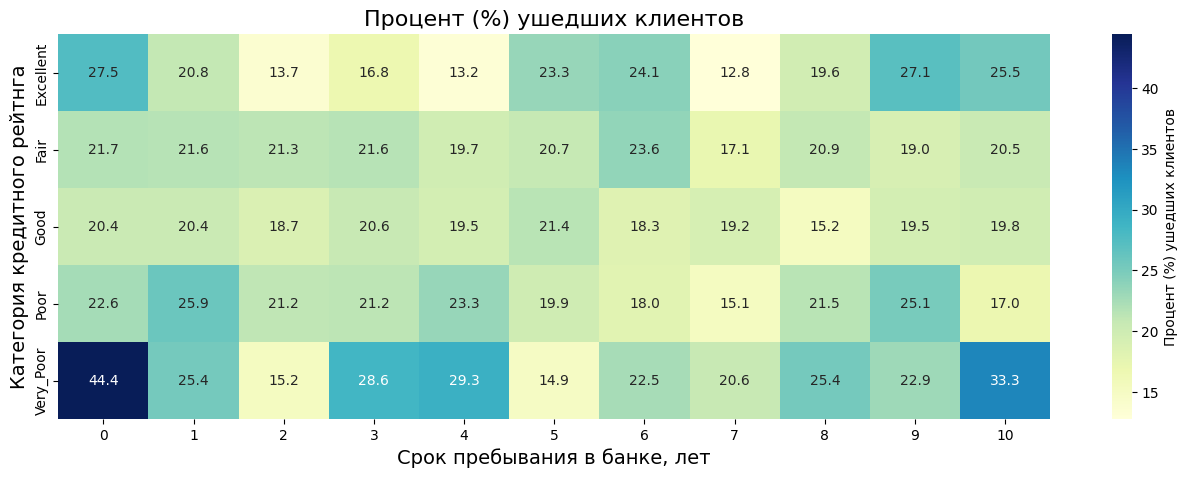

In [19]:
fig = plt.figure(figsize=(16, 5))

fig = sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label':'Процент (%) ушедших клиентов'})

fig.set_title('Процент (%) ушедших клиентов', fontsize=16)
fig.set_xlabel('Срок пребывания в банке, лет', fontsize=14)
fig.set_ylabel('Категория кредитного рейтнга', fontsize=14)

Вывод: Наибольший процент ушедших клиентов наблюдается среди клиентов с очень низким кредитным рейтингом, пробывших в банке меньше года. Также высокий процент среди клиентов с очень низким рейтингом, которые пользуются услугами банка 10 лет, 4 года и 3 года. Много клиентов с безупречным кредитным рейтингом ушло после 0, 9 и 10 лет в банке. Меньше всего ушедших клиентов с рейтингом "Good".